# Datos de NYC Taxi en invierno y verano

In [1]:
import pandas as pd

path = '../../data/taxi.csv'

#Load the csv file into a dataframe
df = pd.read_csv(path)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.0,2019-01-18 08:42:15,2019-01-18 08:56:57,1.0,1.18,1.0,N,43,237,1.0,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1.0,2019-01-19 04:34:45,2019-01-19 04:43:44,1.0,2.30,1.0,N,148,234,1.0,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2.0,2019-01-05 10:37:39,2019-01-05 10:42:03,1.0,0.83,1.0,N,237,263,1.0,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2.0,2019-01-23 10:36:29,2019-01-23 10:44:34,2.0,1.12,1.0,N,144,113,2.0,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


## Exploracion del conjunto de datos 

1. Vamós a visualizar la informacion del cojunto:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               200 non-null    float64
 1   tpep_pickup_datetime   200 non-null    object 
 2   tpep_dropoff_datetime  200 non-null    object 
 3   passenger_count        200 non-null    float64
 4   trip_distance          200 non-null    float64
 5   RatecodeID             200 non-null    float64
 6   store_and_fwd_flag     200 non-null    object 
 7   PULocationID           200 non-null    int64  
 8   DOLocationID           200 non-null    int64  
 9   payment_type           200 non-null    float64
 10  fare_amount            200 non-null    float64
 11  extra                  200 non-null    float64
 12  mta_tax                200 non-null    float64
 13  tip_amount             200 non-null    float64
 14  tolls_amount           200 non-null    float64
 15  improv

Con la lista de variables y sus tipos de datos proporcionados, se puede comenzar a explorar el conjunto de datos.

1. Convertir las fechas a tipos de datos datetime:
- Las columnas tpep_pickup_datetime y tpep_dropoff_datetime están actualmente en formato de objeto. Hay que convertirlas a tipos de datos datetime para facilitar el manejo temporal.

In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

2. Crear una nueva columna para la estación del año:
* Basándose en la pregunta del cliente sobre los hábitos de propina estacional, crearemos una nueva columna que clasifique cada viaje en una estación del año.

In [4]:
df['season'] = df['tpep_pickup_datetime'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,season
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5,Summer
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5,Summer
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5,Summer
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5,Summer
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5,Summer


3. Análisis exploratorio inicial:
* Realizaremos un análisis exploratorio inicial para entender la distribución de las propinas en diferentes estaciones.

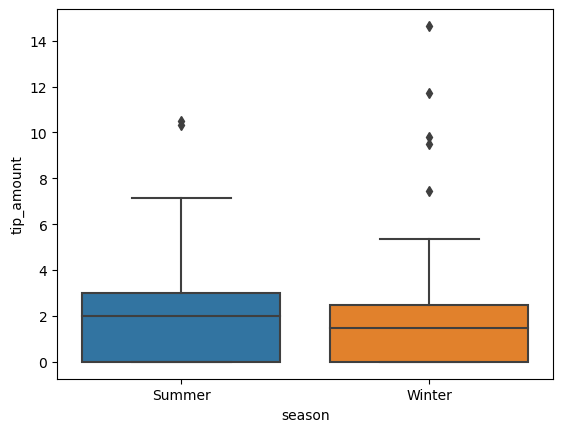

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de propinas por estación
sns.boxplot(x='season', y='tip_amount', data=df)
plt.show()

A partir de este nálisis exploratorio podemos indagar a mas profundidad

* Por ejemplo podemos utilizar un gráfico de barras para visualizar la media de propinas por estación del año:

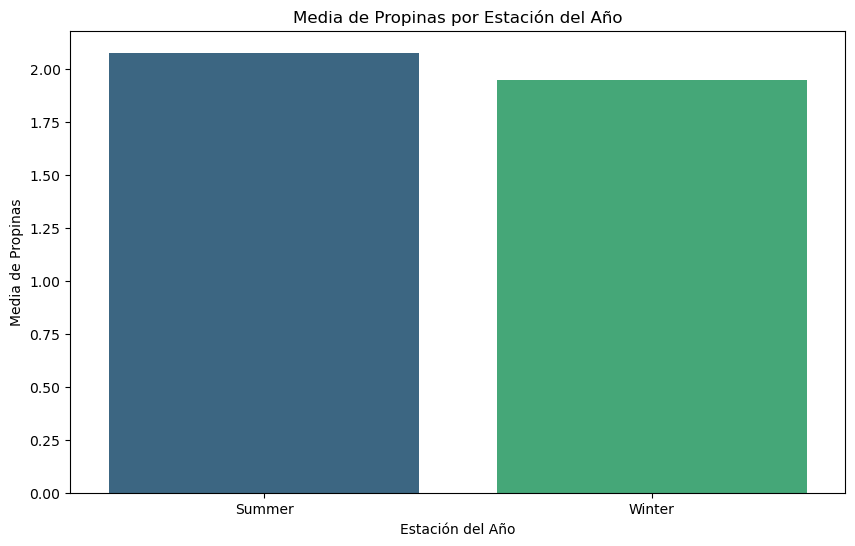

In [6]:
# Calcular la media de propinas por estación
tip_by_season = df.groupby('season')['tip_amount'].mean().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='tip_amount', data=tip_by_season, palette='viridis')
plt.title('Media de Propinas por Estación del Año')
plt.xlabel('Estación del Año')
plt.ylabel('Media de Propinas')
plt.show()